<h2>Ridge Regression</h2>
<p>Code for implementing Ridge Regression with a dataset with standarized 6 features(+1 for offset parameter) describing a single car(such as used year, weight), and with one corresponding y, which is miles per gallon for that car.</p>


In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = 
x_train = pd.read_csv(PATH+"/X_train.csv",header=None)
y_train = pd.read_csv(PATH+"/Y_train.csv",header=None)
x_test = pd.read_csv(PATH+"/X_test.csv",header=None)
y_test = pd.read_csv(PATH+"/Y_test.csv",header=None)
x_train.head()

,0,1,2,3,4,5,6
0,0.30957,-0.36707,0.45545,-0.200830,-0.73992,-0.80885,1
1,0.30957,0.35920,-0.11611,-0.038361,0.16625,-0.80885,1
2,-0.86291,-0.99778,-0.89551,-1.225100,-0.55868,-0.26592,1
3,-0.86291,-0.69198,-0.42787,-0.562260,-0.15997,1.09140,1
4,-0.86291,-0.92133,-0.63571,-1.251000,-0.41369,0.81993,1


In [36]:
x = np.mat(x_train)
y = np.mat(y_train)
I = np.identity(len(x.T))
wrr =pd.DataFrame(np.nan,columns=[1,2,3,4,5,6,7],index=list(range(0,1001))) #wRR = (λI + XTX)-1XTy solved by hand
degree_of_freedom = list()

In [37]:
lam = list(range(0,5001))
for i in lam:
    wrr.loc[i,:]= ((i*I+x.T*x).I*x.T*y).T
    U,S,VT=np.linalg.svd(x*(i*I+x.T*x).I*x.T)
    degree_of_freedom.append(sum(S))
    
wrr.index = degree_of_freedom


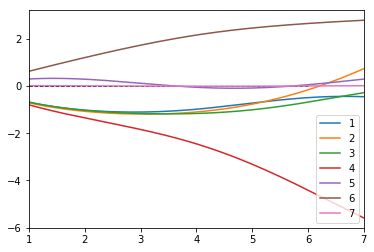

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
wrr.plot(xlim=(1,7),linewidth=1.5)
plt.hlines(0, 6, 0, linewidth=1,colors = "black", linestyles = "dashed")

Comparing with other features, the 4th and 6th dimension can influence a car's MPG more because of the larger weight. When the value of 4th dimension goes up, which have negative effect of the MPG, the MPG will go down. On the contrary, when the 6th dimension goes up, the MPG goes up too.

In [49]:
RMSE = list()
lam = range(0,51)
for i in lam:
    wrr = (i*I+x.T*x).I*x.T*y
    y_pred = np.mat(x_test)*wrr
    RMSE.append((float(sum(np.square(np.mat(y_test)-y_pred))))/42)

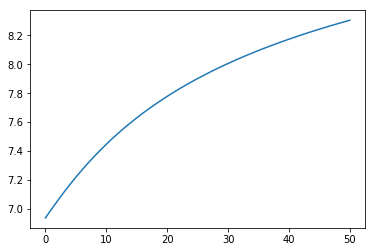

In [50]:
plt.plot(lam,RMSE) 
#when lambda goes up, the RMSE will go up too. Since we want to choose a wrr with least RMSE, 
#here we choose lambda = 0, which makes WRR = WLS.

In [104]:
#Polynomial Regression
x_train2 = pd.DataFrame(np.nan,columns=['1','d1','d2','d3','d4','d5','d6','d1^2','d2^2','d3^2','d4^2','d5^2','d6^2'],index=range(0,len(x_train)))
x_test2 = pd.DataFrame(np.nan,columns=['1','d1','d2','d3','d4','d5','d6','d1^2','d2^2','d3^2','d4^2','d5^2','d6^2'],index=range(0,len(x_test)))
x_train3 = pd.DataFrame(np.nan,columns=['1','d1','d2','d3','d4','d5','d6','d1^2','d2^2','d3^2','d4^2','d5^2','d6^2','d1^3','d2^3','d3^3','d4^3','d5^3','d6^3'],index=range(0,len(x_train)))
x_test3 = pd.DataFrame(np.nan,columns=['1','d1','d2','d3','d4','d5','d6','d1^2','d2^2','d3^2','d4^2','d5^2','d6^2','d1^3','d2^3','d3^3','d4^3','d5^3','d6^3'],index=range(0,len(x_test)))

In [117]:
x_train2.loc[:,'1'] = 1
x_train3.loc[:,'1'] = 1
x_test2.loc[:,'1'] = 1
x_test3.loc[:,'1'] = 1

for i in range(0,6):
    x_train2.iloc[:,i+1] = x_train.iloc[:,i]
    x_train2.iloc[:,i+7] = np.square(x_train.iloc[:,i])
    
    x_test2.iloc[:,i+1] = x_test.iloc[:,i]
    x_test2.iloc[:,i+7] = np.square(x_test.iloc[:,i])
    
    x_train3.iloc[:,i+1] = x_train.iloc[:,i]
    x_train3.iloc[:,i+7] = pow(x_train.iloc[:,i],2)
    x_train3.iloc[:,i+13] = pow(x_train.iloc[:,i],3)
    
    x_test3.iloc[:,i+1] = x_test.iloc[:,i]
    x_test3.iloc[:,i+7] = pow(x_test.iloc[:,i],2)
    x_test3.iloc[:,i+13] = pow(x_test.iloc[:,i],3)

In [120]:
#p=1
x = np.mat(x_train)
y = np.mat(y_train)
I = np.identity(len(x.T))

RMSE1 = list()
lam = range(0,501)
for i in lam:
    wrr = (i*I+x.T*x).I*x.T*y
    y_pred = np.mat(x_test)*wrr
    RMSE1.append((float(sum(np.square(np.mat(y_test)-y_pred))))/42)

#p=2
x = np.mat(x_train2)
y = np.mat(y_train)
I = np.identity(len(x.T))

RMSE2 = list()
lam = range(0,501)
for i in lam:
    wrr = (i*I+x.T*x).I*x.T*y
    y_pred = np.mat(x_test2)*wrr
    RMSE2.append((float(sum(np.square(np.mat(y_test)-y_pred))))/42)

    
#p=3
x = np.mat(x_train3)
y = np.mat(y_train)
I = np.identity(len(x.T))

RMSE3 = list()
lam = range(0,501)
for i in lam:
    wrr = (i*I+x.T*x).I*x.T*y
    y_pred = np.mat(x_test3)*wrr
    RMSE3.append((float(sum(np.square(np.mat(y_test)-y_pred))))/42)


In [125]:
RMSE_total = pd.DataFrame({'RMSE1':RMSE1,'RMSE2':RMSE2,'RMSE3':RMSE3})

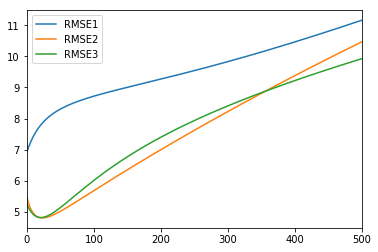

In [132]:
RMSE_total.plot()

In [138]:
RMSE_total['RMSE2'][RMSE_total['RMSE2'] == min(RMSE2)]

23    4.807381
Name: RMSE2, dtype: float64

In [ ]:
#choose the w when RMSE is minimized.